## Problem Statement
### An American insurance company wants to create an automatic system that can predict what is the medical insurance cost of a person

## Work Flow
### Insurance Cost Data -> Data Analysis -> Data Preprocessing -> Train-Test Split -> Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Collection and Analysis

In [2]:
#Loading data from csv file to a Pandas DataFrame
data = pd.read_csv("/Users/jianingjin/Desktop/data analysis/Python/insurance.csv")

In [3]:
#glimpse of data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.shape

(1338, 7)

In [6]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
### categorical variables
### sex, smoker, region

In [9]:
# check missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='age', ylabel='charges'>

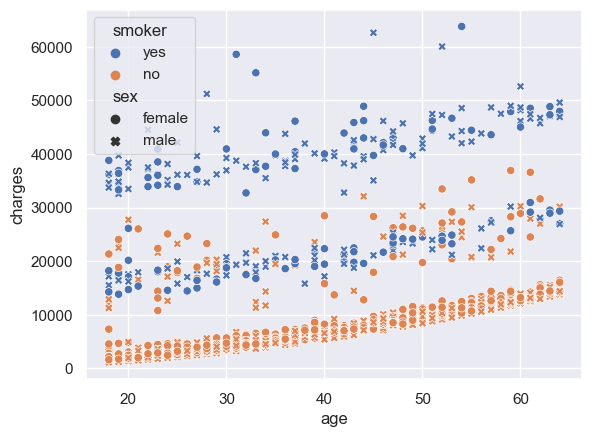

In [21]:
# relationship between age and chargers
sns.scatterplot(x="age", y="charges", hue="smoker", style="sex", data=data)

/Users/jianingjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

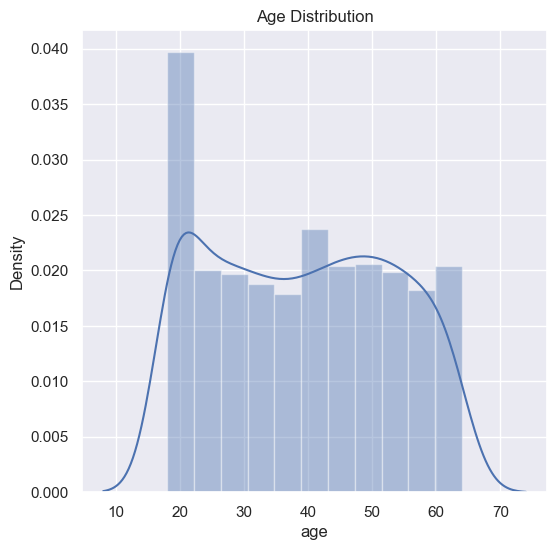

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(data["age"])
plt.title("Age Distribution")
plt.show

/Users/jianingjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

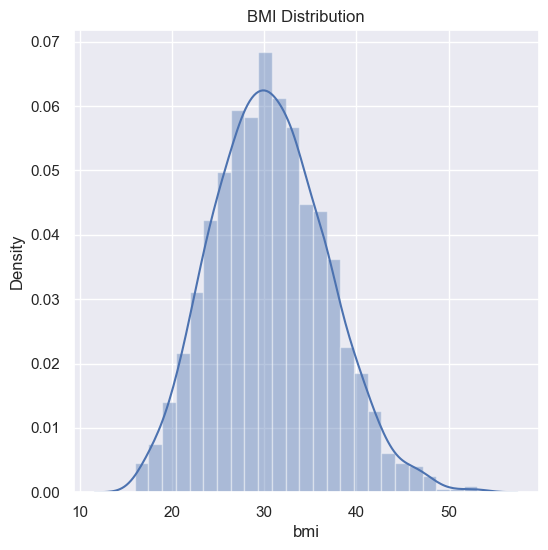

In [24]:
# distribution of BMI value
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(data["bmi"])
plt.title("BMI Distribution")
plt.show

/Users/jianingjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

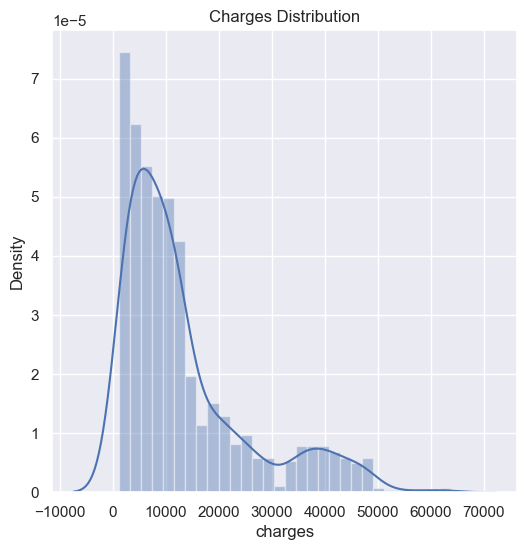

In [25]:
# distribution of Charges value
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(data["charges"])
plt.title("Charges Distribution")
plt.show

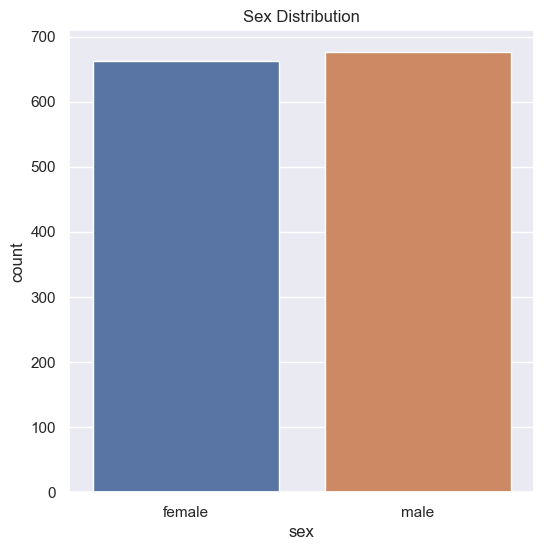

In [23]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

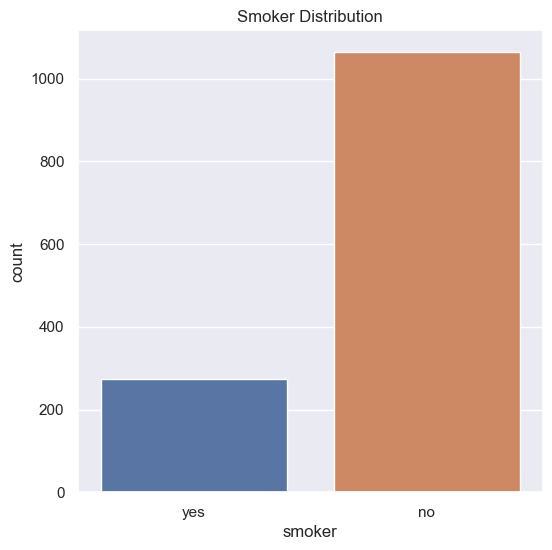

In [27]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('Smoker Distribution')
plt.show()

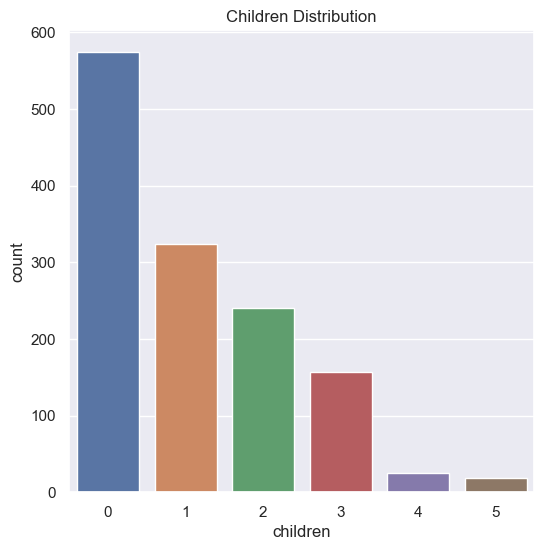

In [29]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children Distribution')
plt.show()

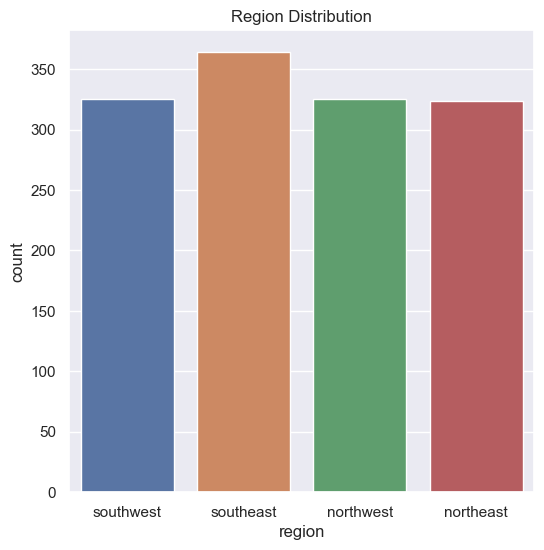

In [30]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('Region Distribution')
plt.show()

### Data Preprocessing

In [31]:
# Replace 'female' with 0 and 'male' with 1 in 'sex' column
data['sex'] = data['sex'].replace({'female': 0, 'male': 1})

# Replace 'no' with 0 and 'yes' with 1 in 'smoker' column
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})

# Convert 'region' to dummy variables
data = pd.get_dummies(data, columns=['region'])

In [32]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [33]:
data.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

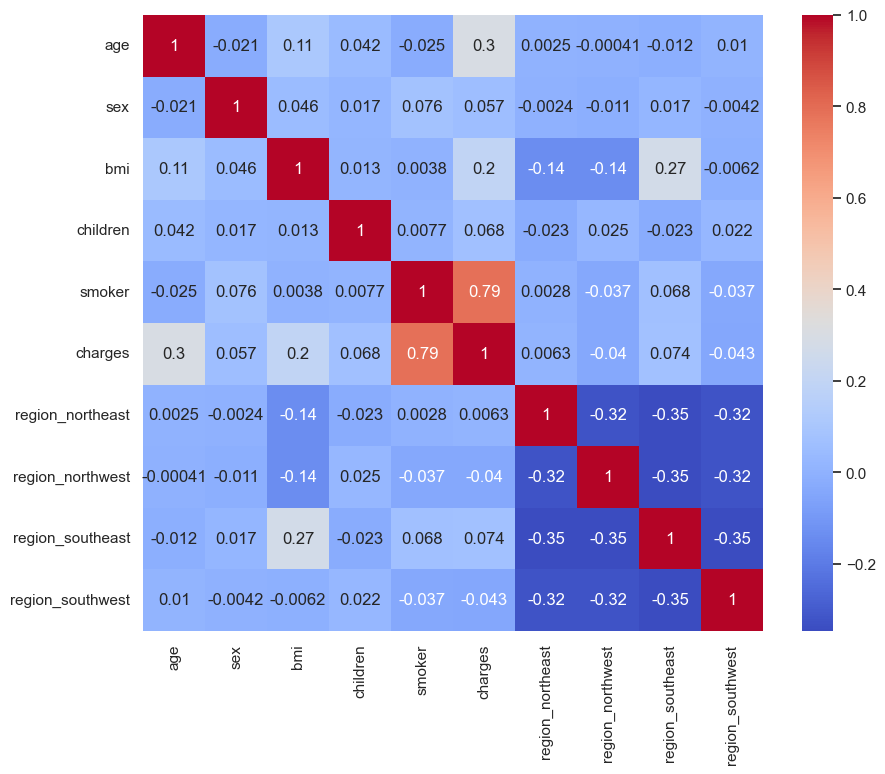

In [38]:
# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [43]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('charges', axis=1), data['charges'], test_size=0.2, random_state=42)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Print R^2 score
print('train R^2 score:', lr.score(X_train, y_train))
print('test R^2 score:', lr.score(X_test, y_test))

train R^2 score: 0.7417255854683333
test R^2 score: 0.7835929767120724


In [41]:
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [ 2.56975706e+02 -1.85916916e+01  3.37092552e+02  4.25278784e+02
  2.36511289e+04  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]
Intercept:  -12390.804294570293


### Build Predition System

In [45]:
# Create a function that takes input values and returns predicted charges
def predict_charges(age, sex, bmi, children, smoker, region):
    # Convert sex and smoker to binary values
    sex_binary = 1 if sex == 'male' else 0
    smoker_binary = 1 if smoker == 'yes' else 0
    
    # Convert region to dummy variables
    if region == 'northeast':
        region_northeast = 1
        region_northwest = 0
        region_southeast = 0
        region_southwest = 0
    elif region == 'northwest':
        region_northeast = 0
        region_northwest = 1
        region_southeast = 0
        region_southwest = 0
    elif region == 'southeast':
        region_northeast = 0
        region_northwest = 0
        region_southeast = 1
        region_southwest = 0
    else:
        region_northeast = 0
        region_northwest = 0
        region_southeast = 0
        region_southwest = 1
    
    # Create a dataframe with the input values
    input_df = pd.DataFrame({'age': [age], 'sex': [sex_binary], 'bmi': [bmi], 'children': [children], 
                             'smoker': [smoker_binary], 'region_northeast': [region_northeast], 
                             'region_northwest': [region_northwest], 'region_southeast': [region_southeast], 
                             'region_southwest': [region_southwest]})
    
    # Use the linear regression model to predict the charges for the input values
    charges_pred = lr.predict(input_df)[0]
    
    return charges_pred

### a taste on Lasso

In [48]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the Lasso model to the training set
lasso.fit(X_train, y_train)

# Evaluate the Lasso model on the testing set
lasso_score = lasso.score(X_test, y_test)
print("Lasso score:", lasso_score)

# Get the coefficients of the Lasso model
lasso_coef = lasso.coef_
print("Lasso coefficients:", lasso_coef)


Lasso score: 0.7835912728390519
Lasso coefficients: [ 2.56974500e+02 -1.81471502e+01  3.37091884e+02  4.25211906e+02
  2.36504999e+04  6.84162259e+02  3.13323057e+02  2.60740642e+01
 -1.25241248e+02]
